**Rozdział 10. Wprowadzenie do sztucznych sieci neuronowych **

_Notatnik ten zawiera przykładowy kod i rozwiązania ćwiczeń opisane w rozdziale 10._

# Konfiguracja

Upewnijmy się najpierw, że notatnik ten będzie działał w środowiskach Python 2 i 3, importujmy kilka powszechnie stosowanych modułów, upewnijmy się, że moduł MatplotLib będzie prawidłowo tworzył wykresy, a także przygotujmy funkcję zapisującą rysunki:

In [1]:
# Obsługa środowisk Python 2 i Python 3
from __future__ import division, print_function, unicode_literals

# Importowanie popularnych modułów
import numpy as np
import os

# W celu zachowania powtarzalności wyników w kolejnych przebiegach
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Generowanie ładnych wykresów
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Lokacja, w której będą zapisywane rysunki
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ssn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "rysunki", CHAPTER_ID, fig_id + ".png")
    print("Zapisywanie rysunku", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrony

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # długość płatka, szerokość płatka
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Zapisywanie rysunku wykres_perceptronu_zestaw_iris


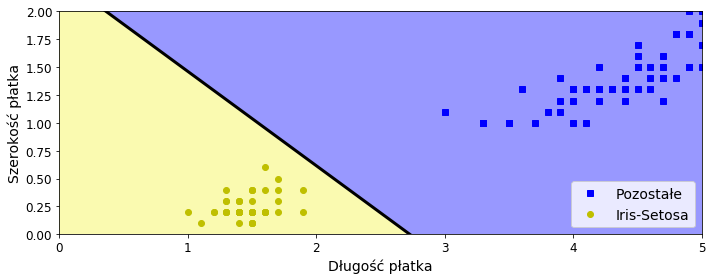

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Pozostałe")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Długość płatka", fontsize=14)
plt.ylabel("Szerokość płatka", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("wykres_perceptronu_zestaw_iris")
plt.show()

# Funkcje aktywacji

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Zapisywanie rysunku wykres_funkcji_aktywacji


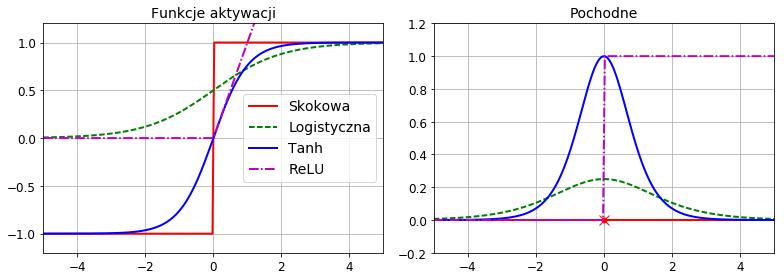

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Skokowa")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logistyczna")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Funkcje aktywacji", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Skokowa")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logistyczna")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Pochodne", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("wykres_funkcji_aktywacji")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

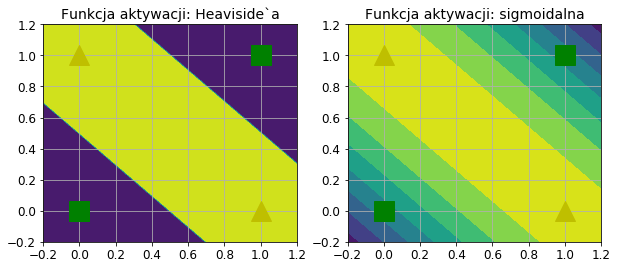

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Funkcja aktywacji: Heaviside`a", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Funkcja aktywacji: sigmoidalna", fontsize=14)
plt.grid(True)

# Jednokierunkowa sieć neuronowa i zestaw MNIST

## Korzystanie z klasy tf.learn

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/dane/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/dane/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/dane/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/dane/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/dane/t10k-labels-idx1-ubyte.gz


In [10]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [11]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # nieukazane w konfiguracji

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # jeśli wersja modułu TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BB8CD43FD0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\KRZYSZ~1\\AppData\\Local\\Temp\\tmpnvb46to8'}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create

SKCompat()

In [12]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\KRZYSZ~1\AppData\Local\Temp\tmpnvb46to8\model.ckpt-40000


0.98209999999999997

In [13]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.071960262984114065

## Korzystanie z samego modułu TensorFlow

In [14]:
import tensorflow as tf

n_inputs = 28*28  # Zestaw MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [15]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [16]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="jadro")
        b = tf.Variable(tf.zeros([n_neurons]), name="obciazenie")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [17]:
with tf.name_scope("gsn"):
    hidden1 = neuron_layer(X, n_hidden1, name="ukryta1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="ukryta2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="wyjscia")

In [18]:
with tf.name_scope("strata"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="strata")

In [19]:
learning_rate = 0.01

with tf.name_scope("uczenie"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [20]:
with tf.name_scope("ocena"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [21]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [22]:
n_epochs = 40
batch_size = 50

In [23]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Dokładność uczenia:", acc_train, "Dokładność walidacji:", acc_val)

    save_path = saver.save(sess, "./moj_model_ostateczny.ckpt")

0 Dokładność uczenia: 0.9 Dokładność walidacji: 0.9146
1 Dokładność uczenia: 0.94 Dokładność walidacji: 0.9348
2 Dokładność uczenia: 0.92 Dokładność walidacji: 0.9466
3 Dokładność uczenia: 0.96 Dokładność walidacji: 0.9508
4 Dokładność uczenia: 0.92 Dokładność walidacji: 0.9586
5 Dokładność uczenia: 0.94 Dokładność walidacji: 0.9586
6 Dokładność uczenia: 0.98 Dokładność walidacji: 0.961
7 Dokładność uczenia: 0.96 Dokładność walidacji: 0.9636
8 Dokładność uczenia: 0.92 Dokładność walidacji: 0.964
9 Dokładność uczenia: 0.96 Dokładność walidacji: 0.965
10 Dokładność uczenia: 0.98 Dokładność walidacji: 0.969
11 Dokładność uczenia: 0.94 Dokładność walidacji: 0.9684
12 Dokładność uczenia: 1.0 Dokładność walidacji: 0.9704
13 Dokładność uczenia: 0.94 Dokładność walidacji: 0.9686
14 Dokładność uczenia: 1.0 Dokładność walidacji: 0.9716
15 Dokładność uczenia: 1.0 Dokładność walidacji: 0.9732
16 Dokładność uczenia: 1.0 Dokładność walidacji: 0.9738
17 Dokładność uczenia: 0.98 Dokładność walidacji: 

In [24]:
with tf.Session() as sess:
    saver.restore(sess, "./moj_model_ostateczny.ckpt") # albo, jeszcze lepiej, użyć obiektu save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./moj_model_ostateczny.ckpt


In [25]:
print("Prognozowane klasy:", y_pred)
print("Rzeczywiste klasy:   ", mnist.test.labels[:20])

Prognozowane klasy: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Rzeczywiste klasy:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [26]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Wyciąga duże wartości stałych z obiektu graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Wizualizuje graf TensorFlow."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [27]:
show_graph(tf.get_default_graph())

## Zastępowanie funkcji `neuron_layer()` funkcją `dense()`

Uwaga: w książce wykorzystywana jest funkcja `tensorflow.contrib.layers.fully_connected()` zamiast funkcji `tf.layers.dense()` (która jeszcze nie istniała w czasie pisania rozdziału). Obecnie zalecane jest używanie funkcji `tf.layers.dense()`, ponieważ wszelkie elementy modułu `contrib` mogą być modyfikowane lub usuwane bez zapowiedzi. Funkcja `dense()` jest niemal identyczna jak funkcja `fully_connected()`, cechuje je jednak kilka pomniejszych różnic:
* zmianie uległy nazwy kilku parametrów: `scope` został zmieniony na `name`, `activation_fn` staje się `activation` (w analogiczny sposób został usunięty przyrostek `_fn` z innych parametrów, takich jak `normalizer_fn`), `weights_initializer` jest przemianowany na `kernel_initializer` itd.
* domyślną wartością parametru `activation` jest teraz `None`, a nie `tf.nn.relu`.
* kilka innych różnic zostało opisanych w rozdziale 11.

In [28]:
n_inputs = 28*28  # zestaw MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [30]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [31]:
with tf.name_scope("gsn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="ukryta1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="ukryta2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="wyjscia")

In [32]:
with tf.name_scope("strata"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="strata")

In [33]:
learning_rate = 0.01

with tf.name_scope("uczenie"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [34]:
with tf.name_scope("ocena"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [35]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [36]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Dokładność uczenia:", acc_train, "Dokładność wobec zestawu testowego:", acc_test)

    save_path = saver.save(sess, "./moj_model_ostateczny.ckpt")

0 Dokładność uczenia: 0.9 Dokładność wobec zestawu testowego: 0.9053
1 Dokładność uczenia: 0.88 Dokładność wobec zestawu testowego: 0.9207
2 Dokładność uczenia: 0.94 Dokładność wobec zestawu testowego: 0.9299
3 Dokładność uczenia: 0.94 Dokładność wobec zestawu testowego: 0.9399
4 Dokładność uczenia: 0.92 Dokładność wobec zestawu testowego: 0.9452
5 Dokładność uczenia: 0.94 Dokładność wobec zestawu testowego: 0.9475
6 Dokładność uczenia: 0.92 Dokładność wobec zestawu testowego: 0.9516
7 Dokładność uczenia: 0.98 Dokładność wobec zestawu testowego: 0.9547
8 Dokładność uczenia: 0.96 Dokładność wobec zestawu testowego: 0.9569
9 Dokładność uczenia: 0.94 Dokładność wobec zestawu testowego: 0.9605
10 Dokładność uczenia: 0.92 Dokładność wobec zestawu testowego: 0.9619
11 Dokładność uczenia: 0.96 Dokładność wobec zestawu testowego: 0.9631
12 Dokładność uczenia: 1.0 Dokładność wobec zestawu testowego: 0.9659
13 Dokładność uczenia: 0.94 Dokładność wobec zestawu testowego: 0.9657
14 Dokładność ucze

In [37]:
show_graph(tf.get_default_graph())

# Rozwiązania ćwiczeń

## 1. do 8.

Patrz dodatek A.

## 9.

_Wyucz głęboką sieć MLP wobec zbioru danych MNIST i sprawdź, czy jesteś w stanie uzyskać dokładność przekraczającą 98%. Podobnie jak w ostatnim ćwiczeniu z rozdziału 9 spróbuj wstawić dodatkowe funkcje (np. zapis punktów kontrolnych, wczytywanie zapisanego stanu w przypadku przerwania nauki, dodaj podsumowania, narysuj wykres krzywych uczących za pomocą programu TensorBoard itd.)_

Najpierw stwózmy sieć głęboką. Proces ten wygląda tak samo, jak zaprezentowano wcześniej, wprowadzamy jeden pewien dodatek: dodajemy funkcję `tf.summary.scalar()` śledzącą w trakcie uczenia funkcję straty i dokładność, dzięki czemu będziemy mogli oglądać ładne krzywe uczenia w programie TensorBoard.

In [38]:
n_inputs = 28*28  # zestaw MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [39]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [40]:
with tf.name_scope("gsn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="ukryta1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="ukryta2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="wyjscia")

In [41]:
with tf.name_scope("strata"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="strata")
    loss_summary = tf.summary.scalar('log_straty', loss)

In [42]:
learning_rate = 0.01

with tf.name_scope("uczenie"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [43]:
with tf.name_scope("ocena"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('dokladnosc', accuracy)

In [44]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Teraz musimy zdefiniować katalog, w którym będą zapisywane dzienniki TensorBoard:

In [45]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_dzienniki"
    if prefix:
        prefix += "-"
    name = prefix + "przebieg-" + now
    return "{}/{}/".format(root_logdir, name)

In [46]:
logdir = log_dir("mnist_gsn")

Teraz tworzymy obiekt `FileWriter` służący do zapisywania dzienników TensorBoard:

In [47]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hej! A może zaimplementujemy wczesne zatrzymywanie? W tym celu będzie nam potrzebny zestaw walidacyjny. Na szczęście zbiór danych zwrócony przez funkcję `input_data()` (patrz wyżej) został już rozdzielony na podzbiór uczący (60 000 przetasowanych próbek), walidacyjny (5 000 próbek) i testowy (5 000 próbek). W ten sposób możemy z łatwością zdefiniować `X_valid` i `y_valid`:

In [48]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [49]:
m, n = X_train.shape

In [50]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/moj_gleboki_model_mnist.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./moj_gleboki_model_mnist"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # jeśli istnieje plik punktu kontrolnego, to odtwarza go i wczytuje numer epoki
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Uczenie zostało przerwane. Wznawiam od epoki", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoka:", epoch,
                  "\tDokładność walidacji: {:.3f}%".format(accuracy_val * 100),
                  "\tFunkcja straty: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Wczesne zatrzymywanie")
                    break

Epoka: 0 	Dokładność walidacji: 90.440% 	Funkcja straty: 0.35228
Epoka: 5 	Dokładność walidacji: 95.060% 	Funkcja straty: 0.17543
Epoka: 10 	Dokładność walidacji: 96.660% 	Funkcja straty: 0.12545
Epoka: 15 	Dokładność walidacji: 97.240% 	Funkcja straty: 0.10428
Epoka: 20 	Dokładność walidacji: 97.580% 	Funkcja straty: 0.08914
Epoka: 25 	Dokładność walidacji: 97.720% 	Funkcja straty: 0.08118
Epoka: 30 	Dokładność walidacji: 97.780% 	Funkcja straty: 0.07794
Epoka: 35 	Dokładność walidacji: 97.920% 	Funkcja straty: 0.07091
Epoka: 40 	Dokładność walidacji: 97.920% 	Funkcja straty: 0.06981
Epoka: 45 	Dokładność walidacji: 97.860% 	Funkcja straty: 0.06782
Epoka: 50 	Dokładność walidacji: 98.060% 	Funkcja straty: 0.06648
Epoka: 55 	Dokładność walidacji: 98.100% 	Funkcja straty: 0.06650
Epoka: 60 	Dokładność walidacji: 98.200% 	Funkcja straty: 0.06508
Epoka: 65 	Dokładność walidacji: 98.100% 	Funkcja straty: 0.06590
Epoka: 70 	Dokładność walidacji: 98.120% 	Funkcja straty: 0.06754
Epoka: 75 	D

In [51]:
os.remove(checkpoint_epoch_path)

In [52]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./moj_gleboki_model_mnist


In [53]:
accuracy_val

0.97829998